# Numerical differentiation examples

In [1]:
from narcpack.diff import fftdiff, iterdiff, smoothed_fd_diff
import numpy as np
import matplotlib.pyplot as pp

## `fftdiff`
We'll try `fftdiff` first. It only really works with periodic data on a uniform grid.

In [2]:
x = np.linspace(0,2*np.pi,512,endpoint=False)
y = np.sin(x)

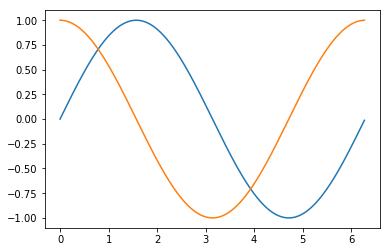

In [3]:
pp.plot(x,y,x,fftdiff(y))

What if the input is no longer periodic?

In [4]:
x = np.linspace(0,2*np.pi,512,endpoint=True)
y = np.sin(x)

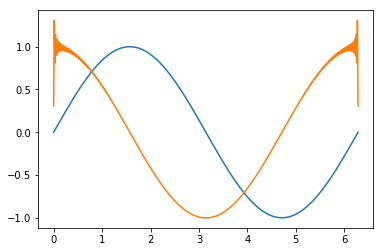

In [5]:
pp.plot(x,y,x,fftdiff(y))

In [9]:
x = np.linspace(0,1,100)
y = x

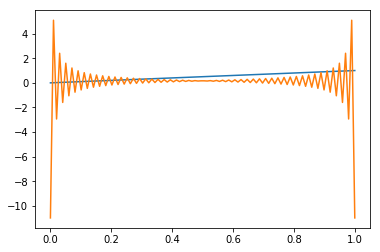

In [10]:
pp.plot(x,y,x,fftdiff(y))

What if we add noise?

In [12]:
x = np.linspace(0,2*np.pi,100,endpoint=False)
y = np.sin(x)+0.1*np.random.rand(np.size(y))

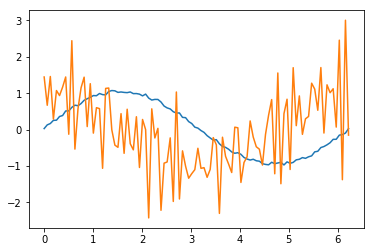

In [15]:
pp.plot(x,y,x,fftdiff(y))

## `iterdiff`
Now we'll try iterated finite differences. It takes the forward finite difference and then iterates a chosen amount of times between taking the antiderivative with the trapezoid rule and differentiating again. The idea is to smooth out derivates of noisy data, which works somewhat. However, nothing special is being done at the boundaries, so the output is shorter than the input.

In [24]:
x = np.linspace(0,2*np.pi,512)
y = np.sin(x)

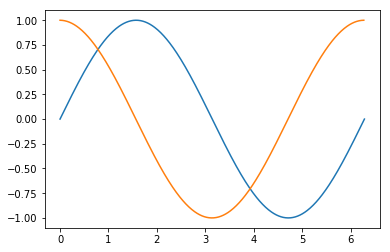

In [25]:
pp.plot(x,y,*iterdiff(x,y))

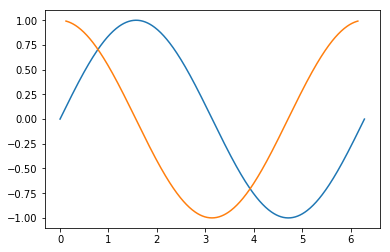

In [26]:
pp.plot(x,y,*iterdiff(x,y,10))

In [27]:
x = np.linspace(0,2*np.pi,512)
y = np.sin(x)+0.1*np.random.rand(np.size(y))

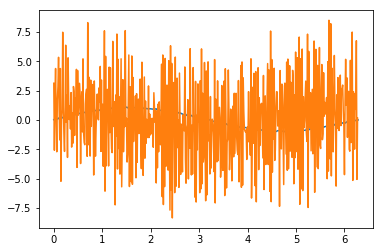

In [28]:
pp.plot(x,y,*iterdiff(x,y))

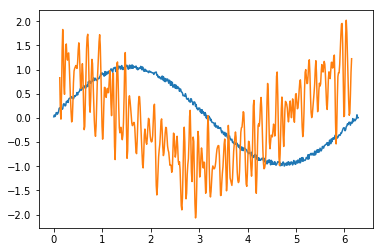

In [29]:
pp.plot(x,y,*iterdiff(x,y,10))

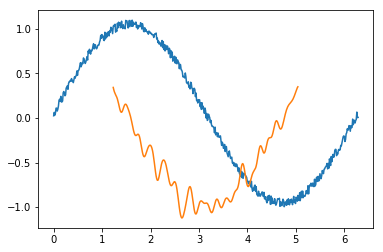

In [30]:
pp.plot(x,y,*iterdiff(x,y,100))

## `smoothed_fd_diff`

The last method applies some smoothing before taking the derivative.

In [31]:
x = np.linspace(0,2*np.pi,512)
y = np.sin(x)+0.1*np.random.rand(np.size(y))

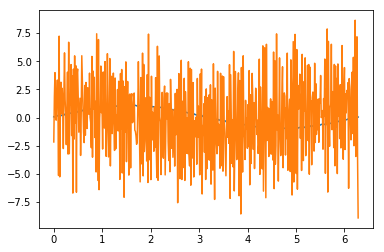

In [33]:
pp.plot(x,y,x,smoothed_fd_diff(y, x))

/usr/lib/python3/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


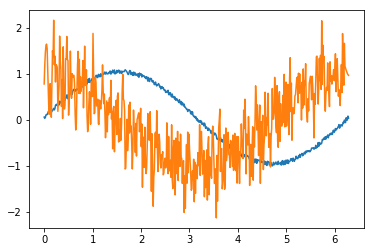

In [37]:
pp.plot(x,y,x,smoothed_fd_diff(y, x, smoother='savgol'))

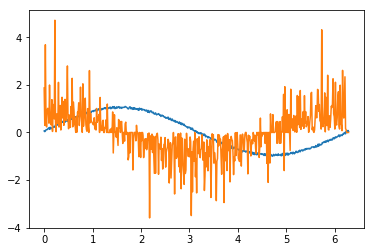

In [41]:
pp.plot(x,y,x,smoothed_fd_diff(y, x, smoother='median'))

/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:492: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


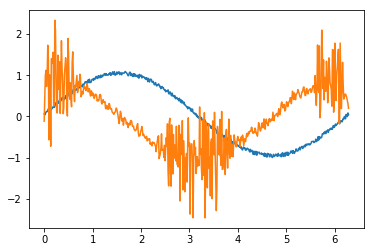

In [43]:
pp.plot(x,y,x,smoothed_fd_diff(y, x, method='centered difference', smoother='wiener', window_length=30))